In [1]:
import os
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

In [2]:
def resize_image(image, target_size):

    height, width, _ = image.shape
    target_width, target_height = target_size
    resized_image = np.zeros((target_height, target_width, 3), dtype=np.uint8)
    
    for i in range(target_height):
        for j in range(target_width):
            original_x = int(j * width / target_width)
            original_y = int(i * height / target_height)
            resized_image[i, j] = image[original_y, original_x]
    
    return resized_image

In [3]:
def insertGambar(folder):
    data = []
    filenames = []
    datalabel = [] 
    path = []
    data_distribution = {}
    for label in (os.listdir(folder)):
        images = os.listdir(folder+label)
        data_distribution[label] = len(images)
        datalabel.append(label)
        print(label)
        for filename in tqdm(os.listdir(folder+label)):
            img = cv.imread(os.path.join(folder+label,filename))
            if img is not None:
                img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                img = resize_image(img, (250, 250))
                filenames.append(filename)
                path.append(label)
                data.append(img)
    return data, filenames, datalabel, path , data_distribution

In [4]:
data, filenames,label, path, distribusi = insertGambar("Dataset/") 
print("Data: ", len(data))
print("Label: ", len(label))
print("Filenames: ", len(filenames))
print("Data Distribution: ", distribusi)

sampled_infeksi


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:19<00:00,  5.20it/s]


sampled_non_infeksi


100%|██████████| 100/100 [00:12<00:00,  8.33it/s]

Data:  200
Label:  2
Filenames:  200
Data Distribution:  {'sampled_infeksi': 100, 'sampled_non_infeksi': 100}


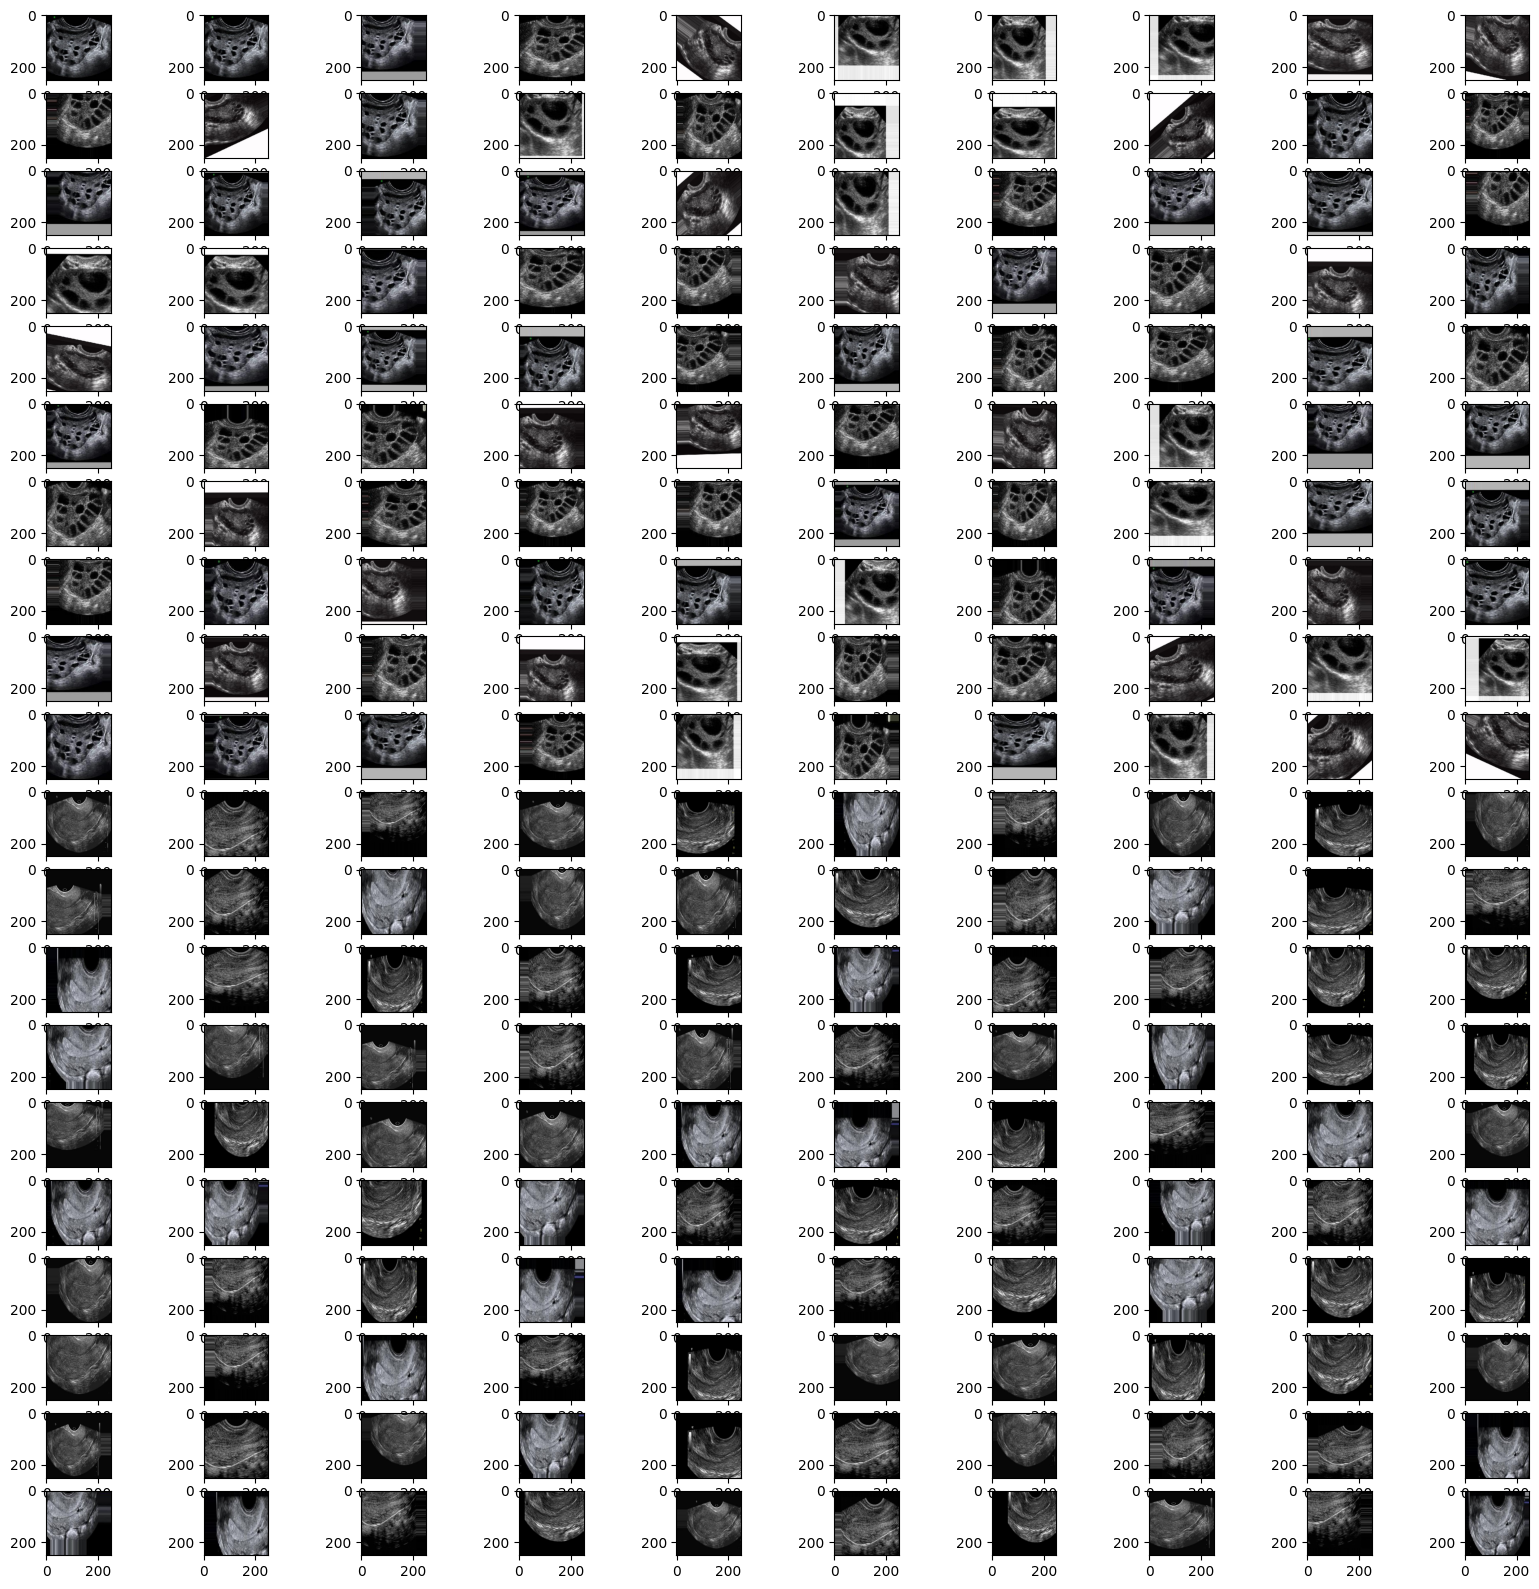

In [5]:
def displayImg(row, column, data):
    total = row * column
    total = min(total, len(data))  
    fig = plt.figure(figsize=(20, 20))
    for i in range(total):
        fig.add_subplot(row, column, i + 1)
        plt.imshow(data[i], cmap='gray')
    plt.show()

    return data

pcos = displayImg(20,10, data)


In [6]:
def grayScaling(img):
    gaussKernel = np.ones((3,3))/9
    r = img[:,:,2]
    g = img[:,:,1]
    b = img[:,:,0]
    filteredR = cv.filter2D(r,-1,gaussKernel)
    filteredG = cv.filter2D(g,-1,gaussKernel)
    filteredB = cv.filter2D(b,-1,gaussKernel)
    return np.round(filteredR/3 + filteredG/3 + filteredB/3).astype(np.uint8)

def grayScalingData(data):
    gray_data = []
    for i in tqdm(range(len(data))):
        gray_data.append(grayScaling(data[i]))
    return gray_data

100%|██████████| 200/200 [00:00<00:00, 328.09it/s]


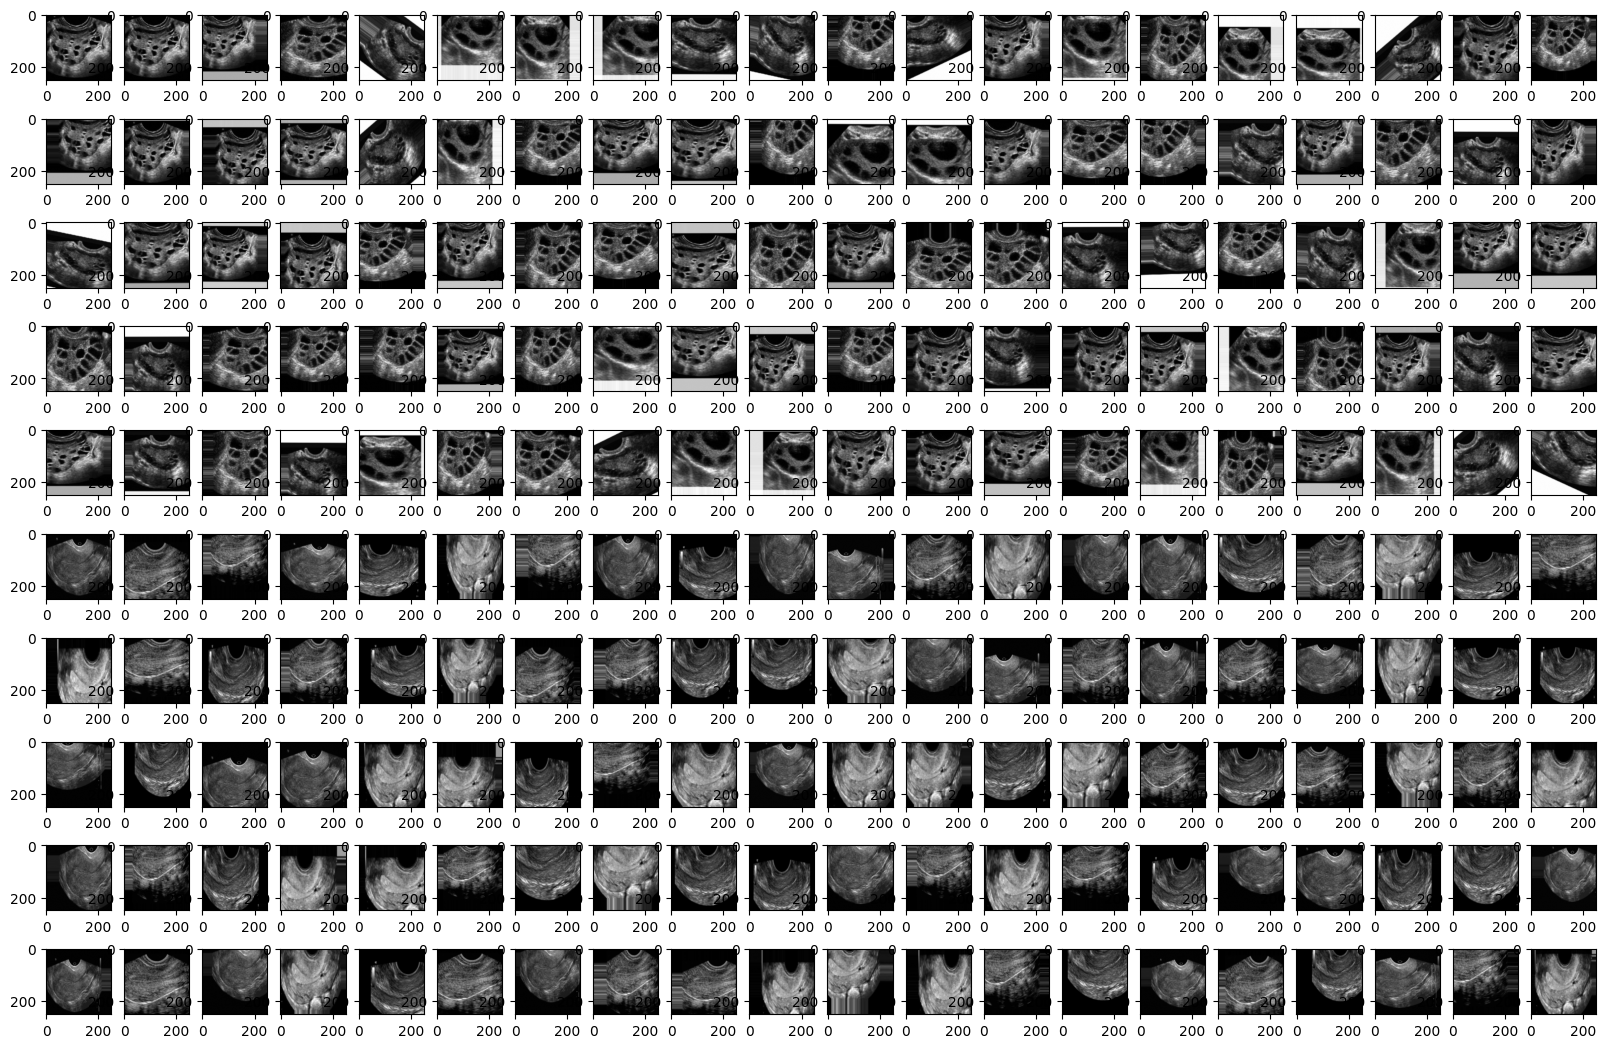

[array([[60, 60, 60, ..., 60, 60, 60],
        [60, 60, 60, ..., 60, 60, 60],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], shape=(250, 250), dtype=uint8),
 array([[60, 60, 60, ..., 60, 60, 60],
        [60, 60, 60, ..., 60, 60, 60],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], shape=(250, 250), dtype=uint8),
 array([[ 10,   7,   5, ...,   1,   1,   1],
        [ 12,   9,   7, ...,   1,   1,   1],
        [  9,   8,   6, ...,   1,   1,   1],
        ...,
        [157, 157, 157, ..., 157, 157, 157],
        [157, 157, 157, ..., 157, 157, 157],
        [157, 157, 157, ..., 157, 157, 157]], shape=(250, 250), dtype=uint8),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 

In [7]:
grayData = grayScalingData(pcos)
displayImg(15, 20, grayData)